In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("/kaggle/input/price-data/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df = df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
def convert_sqft_to_num(x):
 try:
     return float(x)
 except:
     tokens = x.split('-')
     if len(tokens) == 2:
         return (float(tokens[0]) + float(tokens[1])) / 2
     return None
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna()
df['price_per_sqft'] = (df['price']*100000) / df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [6]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head

<bound method NDFrame.head of                        location       size  total_sqft  bath   price  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00   
4                      Kothanur      2 BHK      1200.0   2.0   51.00   
...                         ...        ...         ...   ...     ...   
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00   
13316             Richards Town      4 BHK      3600.0   5.0  400.00   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00   
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00   
13319              Doddathoguru      1 BHK       550.0   1.0   17.00   

       price_per_sqft  bhk  
0         3699.810606    2  
1         4615.384615    4  
2         4305.555

In [7]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df.head()

,location,size,total_sqft,bath,price,price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000,2


In [8]:
dummies = pd.get_dummies(df['location'])
df = pd.concat([df.drop('location', axis=1), dummies], axis=1)
df.head()

,size,total_sqft,bath,price,price_per_sqft,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2 BHK,1056.0,2.0,39.07,3699.810606,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4 Bedroom,2600.0,5.0,120.00,4615.384615,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 BHK,1440.0,2.0,62.00,4305.555556,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 BHK,1521.0,3.0,95.00,6245.890861,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2 BHK,1200.0,2.0,51.00,4250.000000,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
X = df.drop(['price', 'size', 'price_per_sqft'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.5120722457220737
RMSE: 93.06798962494972


In [11]:
def predict_price(location, sqft, bath, bhk):
     loc_index = np.where(X.columns == location)[0]
     x = np.zeros(len(X.columns))
     x[0] = sqft
     x[1] = bath
     x[2] = bhk
     if loc_index.size > 0:
         x[loc_index] = 1
     return model.predict([x])[0]

In [12]:
predict_price('Whitefield', 1200, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.30220889245507

In [13]:
# Only keep rows where 'size' contains a valid number
df = df[df['size'].str.contains('BHK')]

# Create a new column 'bhk' with numeric values
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and x.split(' ')[0].isdigit() else None)

# Drop any rows with nulls in 'bhk'
df = df.dropna(subset=['bhk'])

df = df.drop('size', axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


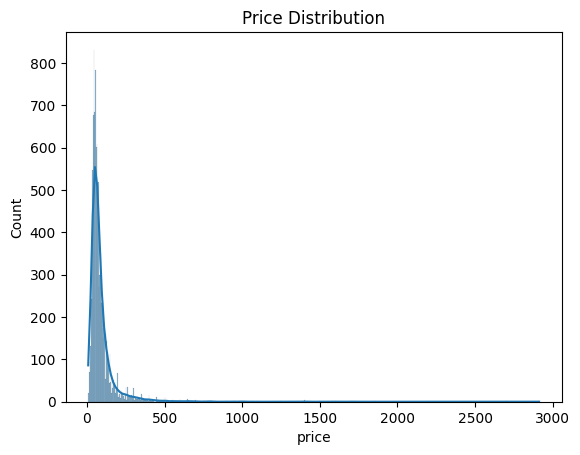

In [14]:
# Price distribution
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

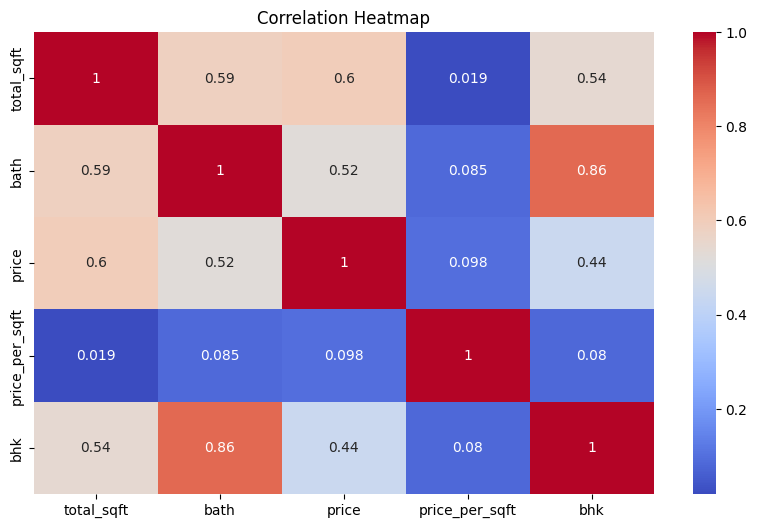

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()